<a href="https://www.kaggle.com/code/yaesnurma/diabetes-analysis?scriptVersionId=187837230" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib and seaborn for data visualization
pd.set_option("display.width", 500)
pd.set_option("display.max_columns", None)


In [2]:
diabet=pd.read_csv(r"/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv")
diabet.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


Parametres / Parametreler:

Id : Unique identifier for each data entry. / Bireyin benzersiz numarası .

Pregnancies : Number of times pregnant. / Bireyin kaç defa hamile kaldığının sayısı.

Glucose : Plasma glucose concentration over 2 hours in an oral glucose tolerance test. / Oral glikoz tolerans testinde 2 saat boyunca plazma glikoz konsantrasyonu.

BloodPressure : Diastolic blood pressure (mm Hg). / Diastolik kan basıncı (mmHg).

SkinThickness : Triceps skinfold thickness (mm). / Triseps deri kıvrımı kalınlığı (mm).

Insulin : 2-Hour serum insulin (mu U/ml). / 2 Saatlik serum insülin (mu U/ml).

BMI : Body mass index (weight in kg / height in m²). / Vücut kitle indeksi (kg cinsinden ağırlık / m² cinsinden boy)

DiabetesPedigreeFunction : Diabetes pedigree function, a genetic score of diabetes. /  Diyabet riskiyle ilişkili genetik bir puanlama.

Age : Age in years. / Yaş (yıl)

Outcome : Binary classification indicating the presence (1) or absence (0) of diabetes. / Diyabet varlığını (1) veya yokluğunu (0) gösteren ikili sınıflandırma.
 

### Oral glucose tolerance test. / Oral Glikoz Tolerans testi :
#### [EN]

The oral glucose tolerance test (OGTT), also known as the sugar challenge test, is a test that measures the response of glucose in the body. With this test, the usage and excretion power of glucose in the body can be monitored, and at the same time; Conditions such as prediabetes, diabetes and gestational diabetes can be diagnosed.  

#### [TR]

Şeker yükleme testi olarak da bilinen oral glukoz tolerans testi (OGTT), vücutta glikozun tepkisini ölçen bir testtir. Bu test ile vücuttaki glikozun kullanım ve atılım gücü takip edilebilmekte, aynı zamanda; prediyabet, diyabet ve gestasyonel diyabet gibi rahatsızlıkların tanısı konabilmektedir





### Diastolic bloond pressure / Diastolik kan basıncı :
#### [EN]

Diastolic value is the pressure still present on the vessel wall when the heart relaxes.

#### [TR]

Diastolik değer ise kalp gevşediğinde hâlâ damar duvarında mevcut olan basınçtır. halk arasında küçük kan basıncı olarak geçer




In [3]:
df=diabet.copy()
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


[EN]

there are some observations in the dataset that cannot be zero .before starting the analysis, we should be aware of such situations.
variables that can be zero: Pregnancies, Outcome.
it is not possible for other variables to be zero under normal conditions.

[TR]

veri setinde sıfır olamayacak bazı gözlem değerleri bulunmakta. analize başlamdan önce bu tip durumların farkında olmalıyız.
sıfır olabilecek değişkenler = Pregnancies, Outcome
diğer  değişkenlerin sıfır olması normal şartlan için mümkün değildir



In [4]:
def previewDataset(dataframe):
    print("The first 5 rows of the Dataset : \n" ,dataframe.head())
    print("\n\n\nColumns info :")
    print("\n", dataframe.info())
    print("\n\n")
    print("Dataframe size : ",dataframe.shape)
    print("\n\n")
    print("columns name : ", dataframe.columns)
    print("\n\n")
    print("The statistic of the dataset : \n",dataframe.describe().T)
    print("\n\n")
    print("Are there any empty variables in the dataset? \n",dataframe.isnull().values.any())
    print("\n\n")
    print("veri seti null değer içermez. ")
    for i,v in enumerate(dataframe.columns):
        num=0
        for value in df[v]:
            if value==0:
                num+=1
               
        print(f"{dataframe.columns[i]} \t {num}")
    print("The data set contains observation values ​​that must not be zero.")
    print("Let's clear these values")
    df1=dataframe.copy()
    print("before removing dataset size : ")
    print(df1.shape)
    columns_to_check = [col for col in df1.columns if col not in ['Pregnancies', 'Outcome','Age']]
    df1 = df[(df[columns_to_check] != 0).all(axis=1)]
    print("after removing dataset size : ")
    print(df1.shape)
    print("\n\n")
    print("view in statistic")
    print("changeed dataset")
    print(df1.describe().T)
    print("\n")
    print("not changed dataset")
    print(dataframe.describe().T)
    return df1



            


"""
[EN]
The function was written to preview the data

[TR]
Fonksiyon veriye ön bakış için yazılmıştır.

"""

'\n[EN]\nThe function was written to preview the data\n\n[TR]\nFonksiyon veriye ön bakış için yazılmıştır.\n\n'

In [5]:
dataf=previewDataset(df)

The first 5 rows of the Dataset : 
    Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0   1            6      148             72             35        0  33.6                     0.627   50        1
1   2            1       85             66             29        0  26.6                     0.351   31        0
2   3            8      183             64              0        0  23.3                     0.672   32        1
3   4            1       89             66             23       94  28.1                     0.167   21        0
4   5            0      137             40             35      168  43.1                     2.288   33        1



Columns info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int6

[EN]
We now have preliminary information about the data set. 
Before moving on to the visualization stage of the data set, we must perform square and continuous variable analysis.
Categorical variables: Outcome
Continuous variables: Glucose, BloodPressure, SkinThinckness, Insulin, BMI, DiabetesPedigreeFunction


[TR]
Veri setiyle ilgili ön bilgimiz var artık. 
veri setini görselleştiştirme aşamasına geçmeden önce karegorik ve sürekli değişken analizi yapmalıyız.
Kategorik değişkenler : Outcome
Sürekli değişkenler :  Glucose , BloodPressure , SkinThinckness , Insulin , BMI , DiabetesPedigreeFunction 



In [6]:
dataf.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1427.0,1389.848633,794.349810,4.000,695.00,1392.000,2070.000,2768.00
Pregnancies,1427.0,3.217239,3.178938,0.000,1.00,2.000,5.000,17.00
Glucose,1427.0,122.783462,30.700175,56.000,99.00,120.000,143.000,198.00
BloodPressure,1427.0,70.765242,12.376185,24.000,62.00,70.000,78.000,110.00
SkinThickness,1427.0,29.231254,10.543761,7.000,21.00,29.000,37.000,63.00
Insulin,1427.0,154.526279,113.518013,14.000,76.50,126.000,190.000,846.00
BMI,1427.0,33.246811,7.076903,18.200,28.40,33.300,37.400,67.10
DiabetesPedigreeFunction,1427.0,0.522896,0.335847,0.085,0.28,0.452,0.687,2.42
Age,1427.0,30.723896,10.086415,21.000,23.00,27.000,36.000,81.00
Outcome,1427.0,0.327260,0.469378,0.000,0.00,0.000,1.000,1.00


In [7]:
age=pd.cut(dataf["Age"],[21,25,30,40,50,70])
insulin=pd.cut(dataf["Insulin"],[100,115,130,145,160,175,190,205,220,235,250])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


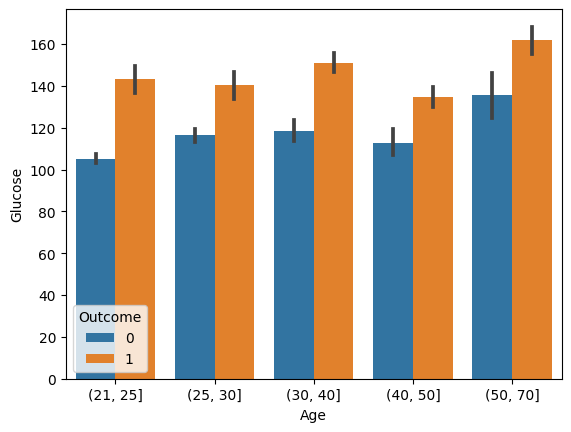

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


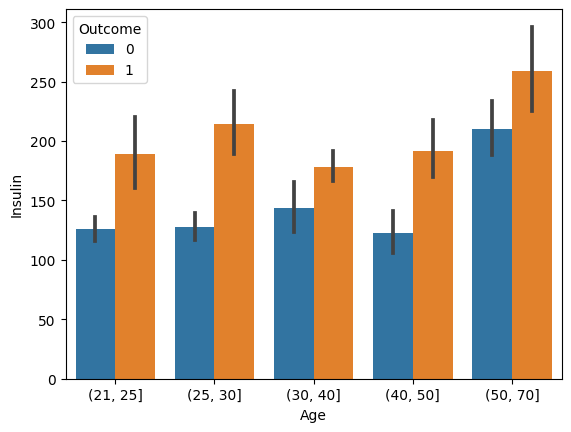

In [8]:
sns.barplot(x=age,y=dataf["Glucose"],hue=dataf["Outcome"],data=dataf)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()
sns.barplot(x=age,y=dataf["Insulin"],hue=dataf["Outcome"],data=dataf)
plt.show()
